In [3]:
import dgym as dg
import pandas as pd

results = pd.read_parquet('../../dgym-data/experiment_annotations.parquet')
smiles = (
    results
    .sort_values('utility', ascending=False)
    .reindex(columns=['SMILES', 'ABL1 pIC50', 'Log S', 'Log P'])
    .iloc[0]['SMILES']
)
mol = dg.molecule.Molecule(smiles)

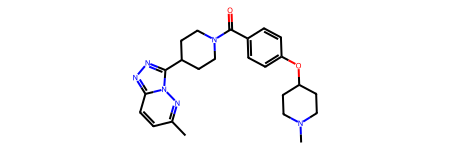

In [6]:
mol.mol

In [10]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D

# Create a molecule
mol = Chem.MolFromSmiles('CC(=O)O')

drawer = rdMolDraw2D.MolDraw2DSVG(500, 500)

# Draw the molecule
drawer.DrawMolecule(mol)

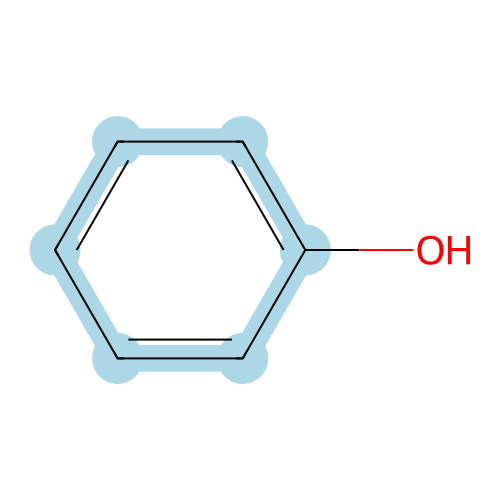

In [16]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import display, SVG

def color_name_to_rgb(color_name):
    """
    Converts a color name to an RGB tuple.

    Parameters
    ----------
    color_name : str
        The name of the color (e.g., 'red', 'green', 'blue').

    Returns
    -------
    tuple
        A tuple representing the RGB values (r, g, b), each in the range 0-1.
    """
    # Basic colors dictionary (more can be added as needed)
    colors = {
        'red': (1, 0, 0),
        'green': (0, 1, 0),
        'blue': (0, 0, 1),
        'lightblue': (0.678, 0.847, 0.902),
        'yellow': (1, 1, 0),
        'black': (0, 0, 0),
        'white': (1, 1, 1)
    }
    return colors.get(color_name.lower(), (0, 0, 0))  # Default to black if color not found

def visualize_molecule(smiles, fill_color='lightblue', image_size=(500, 500)):
    """
    Visualizes a molecule with high resolution, filling the rings with a specified color.

    Parameters
    ----------
    smiles : str
        The SMILES string of the molecule to visualize.
    fill_color : str, optional
        The color used to fill the rings, by default 'lightblue'.
    image_size : tuple, optional
        The size of the image in pixels, by default (500, 500).

    Returns
    -------
    str
        An SVG string containing the visualized molecule.
    """
    # Convert SMILES to a molecule object
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        raise ValueError("Invalid SMILES string provided.")

    # Create a drawing object with specified size and options
    drawer = rdMolDraw2D.MolDraw2DSVG(*image_size)
    drawer.drawOptions().addAtomIndices = False
    rgb_color = color_name_to_rgb(fill_color)
    drawer.drawOptions().setHighlightColour(rgb_color)
    drawer.drawOptions().continuousHighlight = True

    # Detect ring systems and highlight them
    ring_info = mol.GetRingInfo()
    rings = ring_info.AtomRings()
    highlight_atoms = [atom for ring in rings for atom in ring]

    # Draw the molecule
    drawer.DrawMolecule(mol, highlightAtoms=highlight_atoms)
    drawer.FinishDrawing()

    # Convert SVG data to an image display object
    svg = drawer.GetDrawingText()
    return svg.replace('svg:', '')

# Example usage
smiles_string = 'c1ccccc1O'  # Benzene with an OH group
svg_image = visualize_molecule(smiles_string)
display(SVG(svg_image))